In [47]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model

In [48]:
def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [49]:
def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [50]:
def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

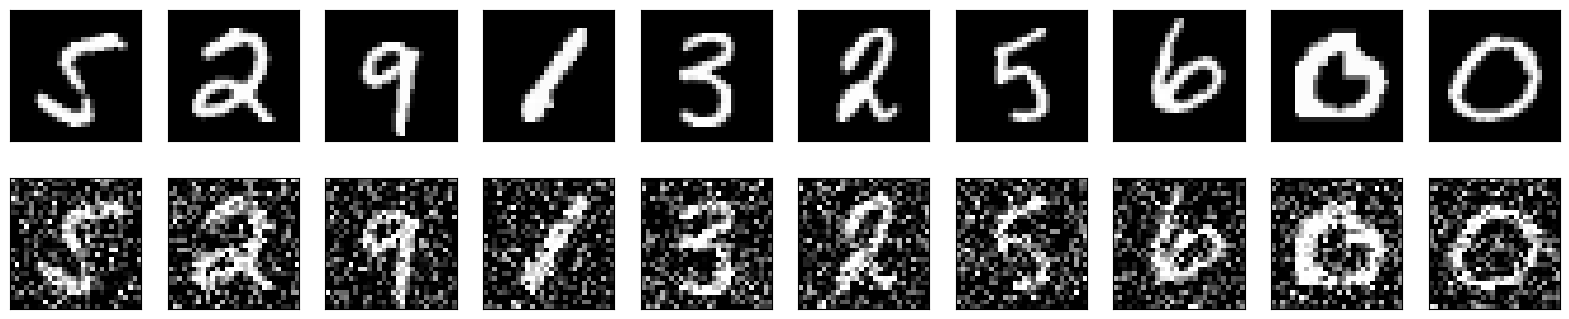

In [52]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [53]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_22                  │ (None, 14, 14, 32)          │           9,248 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_23                  │ (None, 28, 28, 32)          │           9,248 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - loss: 0.2517 - val_loss: 0.0729
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - loss: 0.0724 - val_loss: 0.0694
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - loss: 0.0696 - val_loss: 0.0680
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - loss: 0.0684 - val_loss: 0.0671
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - loss: 0.0674 - val_loss: 0.0665
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - loss: 0.0668 - val_loss: 0.0661
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - loss: 0.0664 - val_loss: 0.0657
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0661 - val_loss: 0.0653
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - loss: 0.0653 - val_loss: 0.0648
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - loss: 0.0652 - val_loss: 0.0647
Epoch 12/50
469/469 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


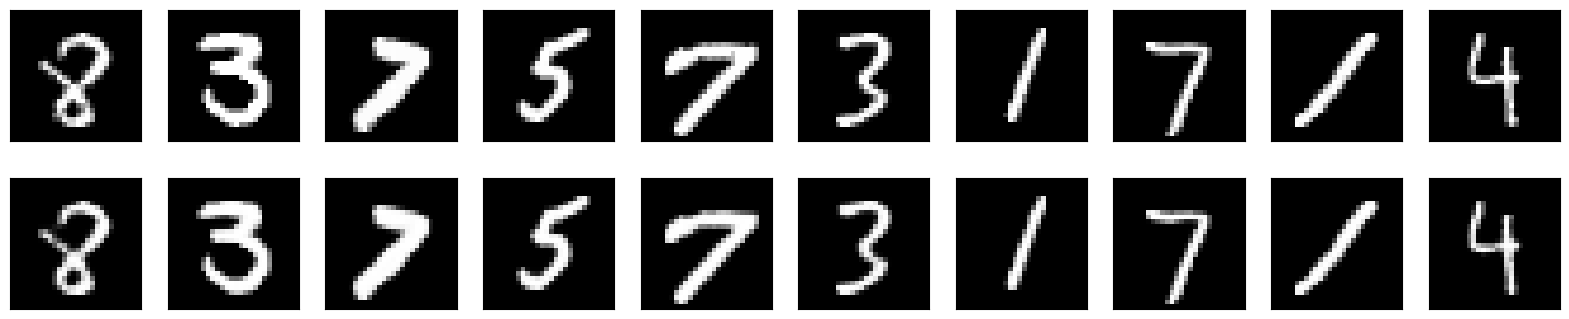

In [55]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [56]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - loss: 0.1140 - val_loss: 0.0936
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0938 - val_loss: 0.0916
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 0.0920 - val_loss: 0.0904
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - loss: 0.0910 - val_loss: 0.0897
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - loss: 0.0901 - val_loss: 0.0891
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - loss: 0.0896 - val_loss: 0.0887
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - loss: 0.0892 - val_loss: 0.0882
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 0.0888 - val_loss: 0.0878
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - loss: 0.0884 - val_loss: 0.0875
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - loss: 0.0883 - val_loss: 0.0872
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - loss: 0.0879 - val_loss: 0.0870
Epoch 12/100
469/4

Epoch 67/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - loss: 0.0846 - val_loss: 0.0844
Epoch 68/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - loss: 0.0846 - val_loss: 0.0843
Epoch 69/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - loss: 0.0845 - val_loss: 0.0845
Epoch 70/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - loss: 0.0846 - val_loss: 0.0845
Epoch 71/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - loss: 0.0846 - val_loss: 0.0844
Epoch 72/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - loss: 0.0846 - val_loss: 0.0849
Epoch 73/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 86ms/step - loss: 0.0846 - val_loss: 0.0843
Epoch 74/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0845 - val_loss: 0.0843
Epoch 75/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0845 - val_loss: 0.0843
Epoch 76/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0846 - val_loss: 0.0844
Epoch 77/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - loss: 0.0844 - val_loss: 0.0842
Epoch 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


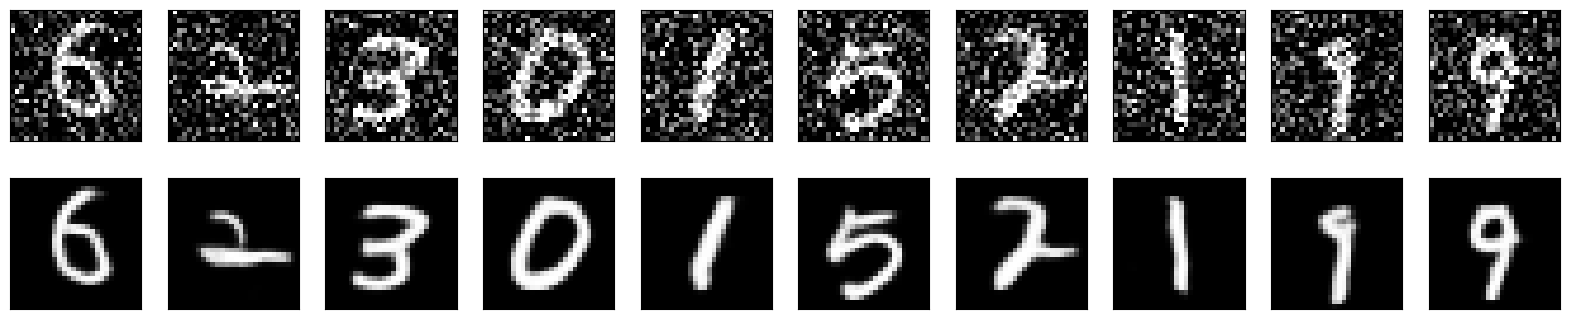

In [58]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)